In [2]:
import mglearn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from matplotlib import pyplot as plt
%matplotlib inline

w[0]: 0.393906  b: -0.031804


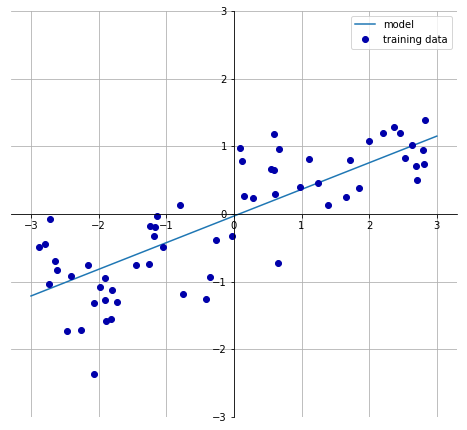

In [2]:
mglearn.plots.plot_linear_regression_wave()

Train a linear model

In [3]:
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [5]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [6]:
print('coef:%s' % lr.coef_)
print('intercept: %s' % lr.intercept_)

coef:[0.39390555]
intercept: -0.03180434302675973


In [ ]:
print('score on the train set: %s' % lr.score(X_train, y_train))
print('score on the test set: %s' % lr.score(X_test, y_test))

score on the train set: 0.6700890315075756
score on the test set: 0.6593368596863701


Load boston housing

In [4]:
boston = mglearn.datasets.load_boston()

X = boston['data']

nrows, ncols = X.shape
print('rows = %s; cols = %s' % (nrows, ncols))

rows = 506; cols = 13


In [9]:
X[0]

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

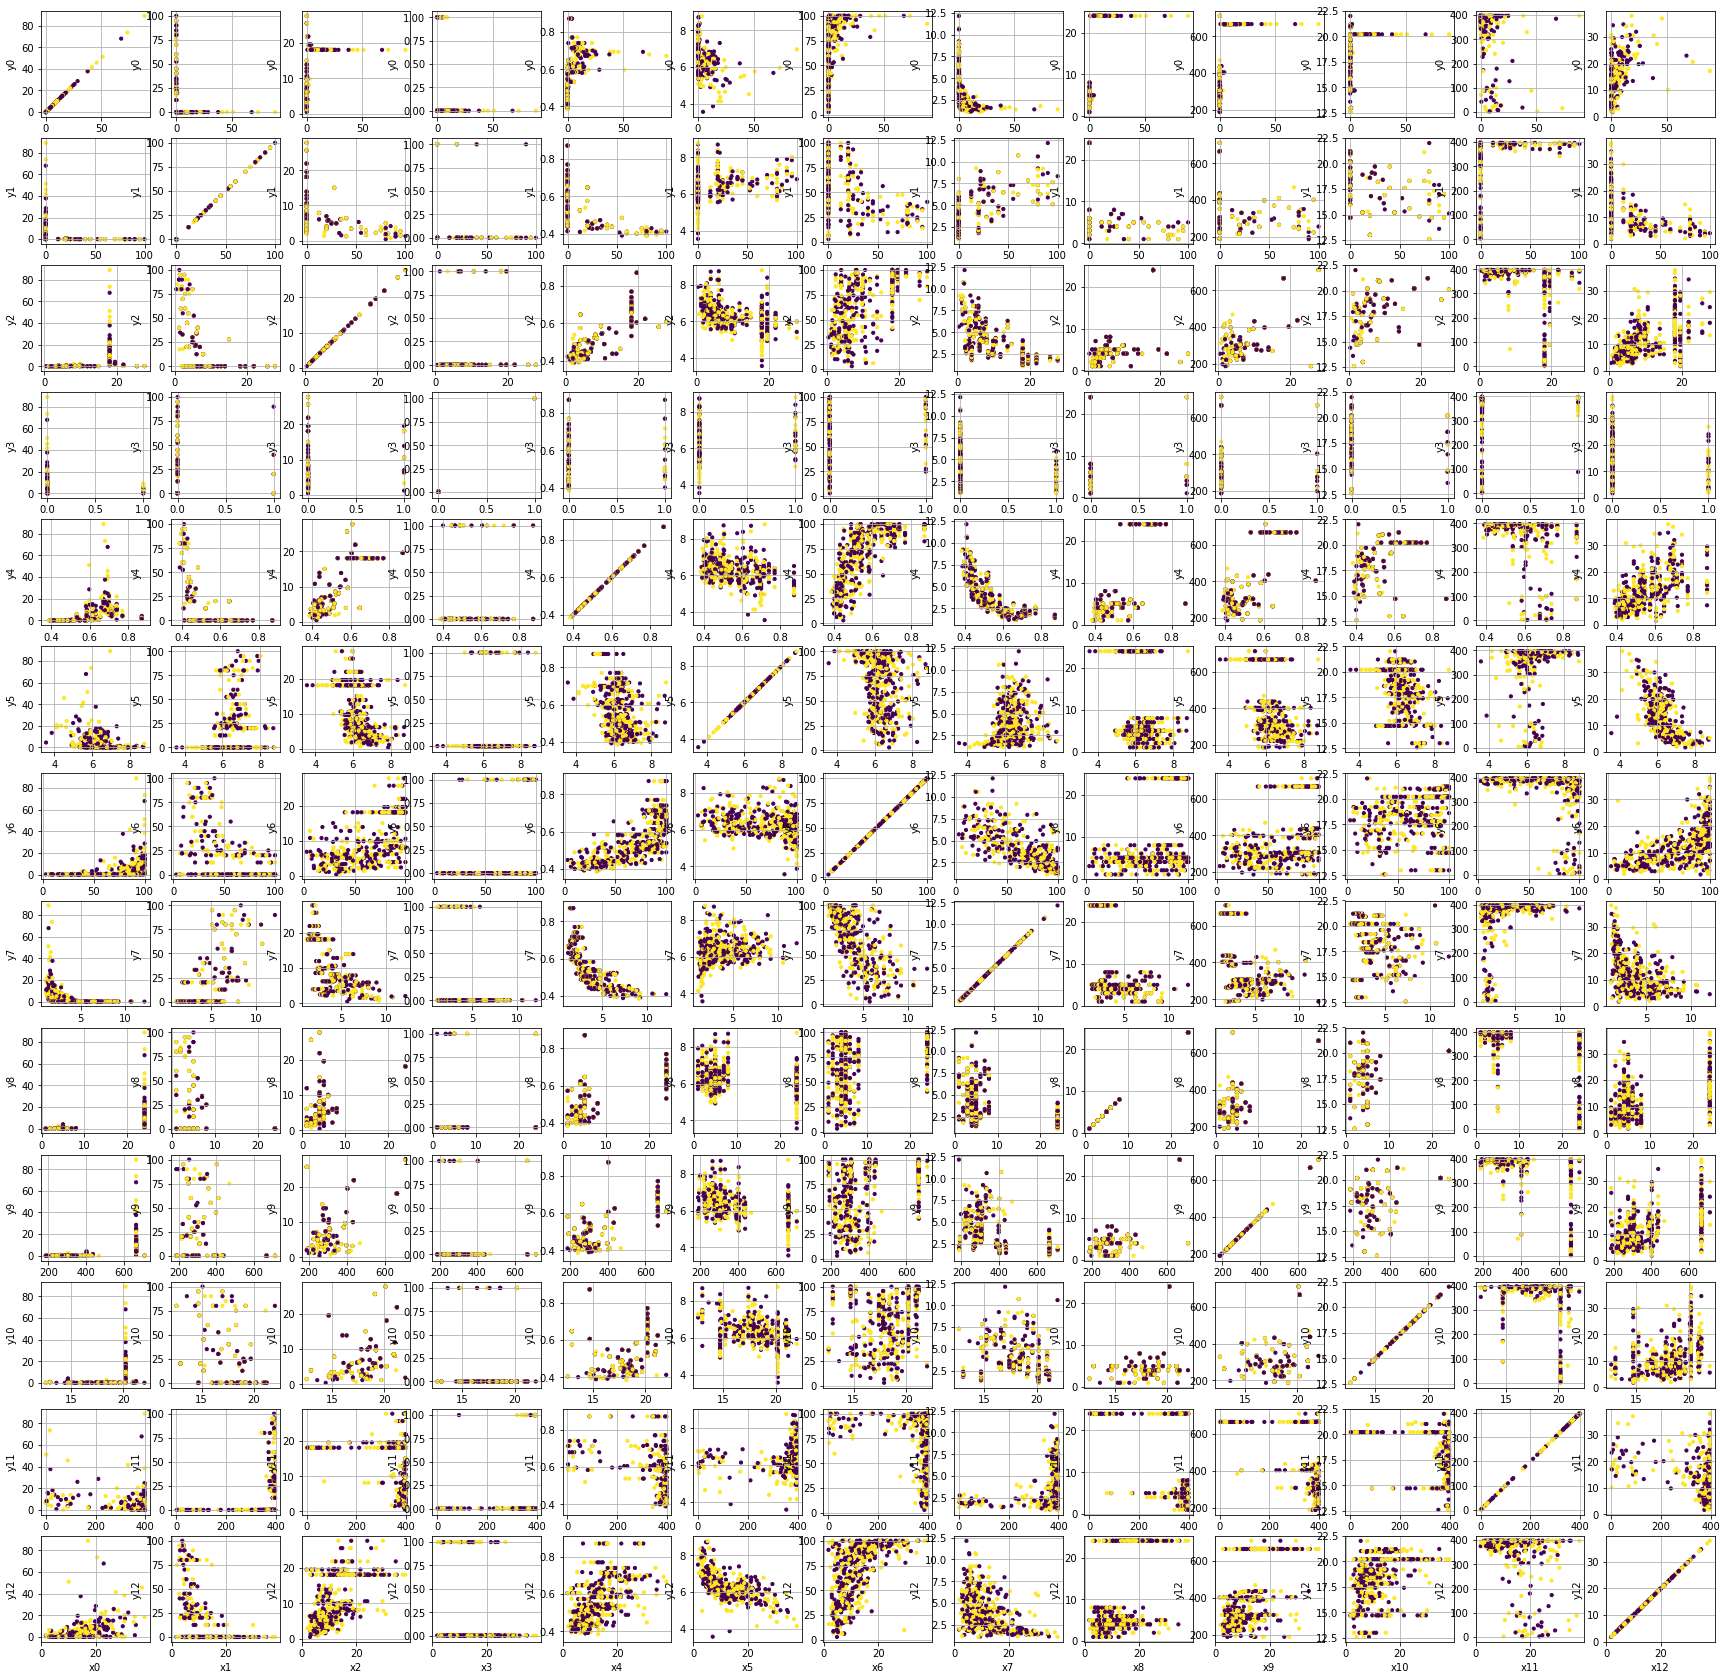

In [17]:
fig, axes = plt.subplots(nrows=ncols, ncols=ncols, figsize=(30, 30))

for i in range(ncols):
    for j in range(ncols):
        ax = axes[i, j]
        ax.scatter(X[:, i], X[:, j], s=10, marker='o', 
                   c=[10*(1 + (-1) ** i) for i in range(nrows)])
        ax.set_xlabel('x%s' % j)
        ax.set_ylabel('y%s' % i)
        ax.grid(True)

Load and split extended boston housing

In [5]:
X, y = mglearn.datasets.load_extended_boston()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [22]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

The linear regression

In [23]:
print('score on the train set: %s' % lin_reg.score(X_train, y_train))
print('score on the test set: %s' % lin_reg.score(X_test, y_test))

score on the train set: 0.9523526436864239
score on the test set: 0.6057754892935757


The ridge regression

In [24]:
ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [25]:
print('score on the train set: %s' % ridge.score(X_train, y_train))
print('score on the test set: %s' % ridge.score(X_test, y_test))

score on the train set: 0.8860578560395836
score on the test set: 0.7527139600306947


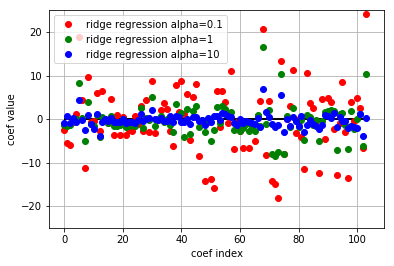

In [21]:
train_scores = list()
test_scores = list()

alphas = list()
alphas.append(0.1)
alphas.extend([i for i in range(1, 11)])

colors = {
    0.1: 'red',
    1: 'green',
    10: 'blue'
}

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    train_scores.append(ridge.score(X_train, y_train))
    test_scores.append(ridge.score(X_test, y_test))
    
    if alpha in [0.1, 1, 10]:
        plt.plot(ridge.coef_, 'o', color=colors[alpha], 
                 label='ridge regression alpha=%s' % alpha)
        plt.xlabel("coef index")
        plt.ylabel("coef value")
        plt.hlines(0, 0, len(ridge.coef_))
        plt.ylim(-25, 25)
        plt.grid()
        plt.legend()

[0.1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


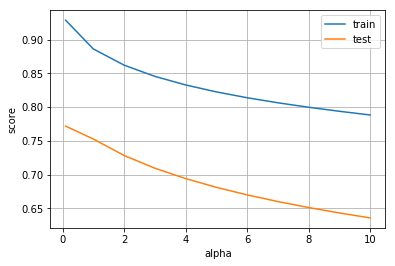

In [22]:
plt.plot(alphas, train_scores, label='train')
plt.plot(alphas, test_scores, label='test')
plt.xlabel('alpha')
plt.ylabel('score')
plt.grid()
plt.legend()

print(alphas)

The Lasso regression

In [9]:
lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [10]:
print('score on the train set: %s' % lasso.score(X_train, y_train))
print('score on the test set: %s' % lasso.score(X_test, y_test))

score on the train set: 0.29323768991114607
score on the test set: 0.20937503255272316


In [11]:
print('number of important features: %s' % sum(lasso.coef_ != 0))

number of important features: 4


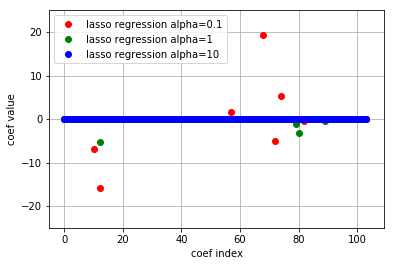

In [23]:
train_scores = list()
test_scores = list()

alphas = list()
alphas.append(0.1)
alphas.extend([i for i in range(1, 11)])

colors = {
    0.1: 'red',
    1: 'green',
    10: 'blue'
}

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    train_scores.append(lasso.score(X_train, y_train))
    test_scores.append(lasso.score(X_test, y_test))
    
    if alpha in [0.1, 1, 10]:
        plt.plot(lasso.coef_, 'ro', color=colors[alpha], label='lasso regression alpha=%s' % alpha)
        plt.xlabel('coef index')
        plt.ylabel('coef value')
        plt.hlines(0, 0, len(lasso.coef_))
        plt.ylim(-25, 25)
        plt.grid()
        plt.legend()

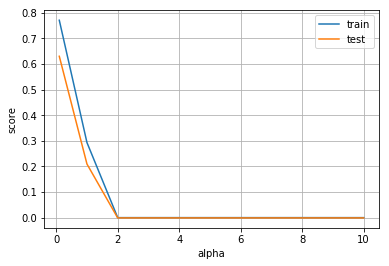

In [24]:
plt.plot(alphas, train_scores, label='train')
plt.plot(alphas, test_scores, label='test')
plt.xlabel('alpha')
plt.ylabel('score')
plt.grid()
plt.legend()